In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import cv2
from IPython.display import Image
from IPython.core.display import HTML 
import PIL.Image

In [6]:
np.random.seed(0)

(60000, 28, 28)
(10000, 28, 28)
60000
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


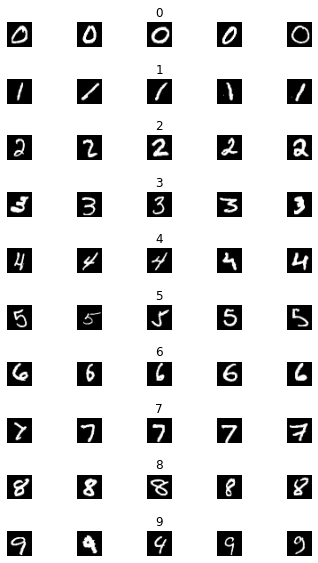

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
print(num_of_samples)

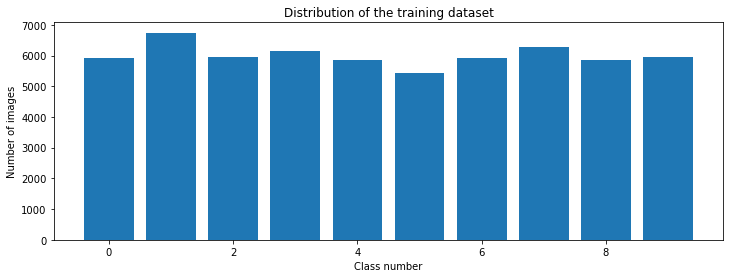

In [8]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
270/270 [==============================] - 2s 3ms/step - loss: 0.7024 - accuracy: 0.7635 - val_loss: 0.3838 - val_accuracy: 0.8922
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8851 - val_loss: 0.3296 - val_accuracy: 0.9015
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8952 - val_loss: 0.2796 - val_accuracy: 0.9207
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.9020 - val_loss: 0.2807 - val_accuracy: 0.9187
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.9077 - val_loss: 0.2841 - val_accuracy: 0.9173
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.9082 - val_loss: 0.2591 - val_accuracy: 0.9223
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3056 - accuracy: 0.9101 - val_loss: 0.2778 - val_accuracy: 0.9188
Epoch 

Text(0.5, 0, 'epoch')

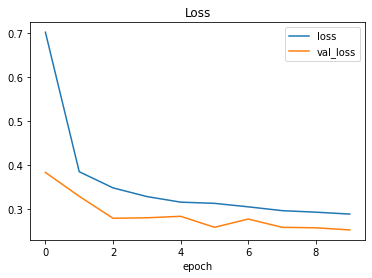

In [11]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

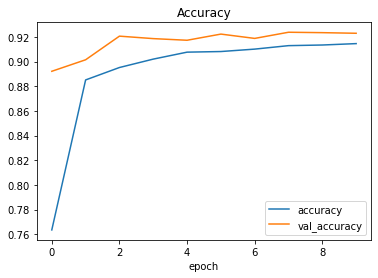

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

[0.3074374198913574, 0.9096999764442444]
<class 'list'>
Test score: 0.3074374198913574
Test accuracy: 0.9096999764442444


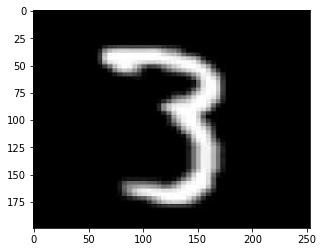

In [91]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSb4Q3wVVEyo0vE0q64NPJYmChqXj5jDIuyx4LQGmV53iRdXFA7dvwLiQMWB_bEUarN8sU&usqp=CAU'
# 'https://www.saraai.com/images/blog/mnist1.png' = 7
response = requests.get(url, stream = True)
img = Image.open(response.raw)

plt.imshow(img)

(28, 28, 3)


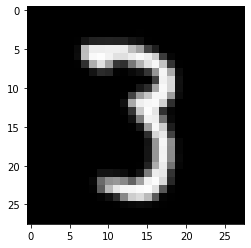

In [95]:
img_arr = np.asarray(img)
img = cv2.resize(img_arr, (28, 28))
print(img.shape)
# gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = cv2.bitwise_not(img)
# print(img)

In [96]:
image = image / 255
image = image.reshape(1, 784)
prediction = model.predict(image)
p = str(prediction)
print("predicted digit:", p)

1/1 [==============================] - 0s 24ms/step
predicted digit: [[0.04563095 0.27065265 0.01553018 0.01831735 0.08528027 0.19296245
  0.05662196 0.29113305 0.00697493 0.01689626]]
